In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [4]:
credit_df = pd.read_csv( "Data/German Credit Data.csv" )
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [6]:
credit_df.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


In [7]:
credit_df.tail()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1
999,A12,45,A34,4576,A62,A71,3,A93,4,27,A143,1,A173,0


In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(credit_df)

In [9]:
import seaborn as sns

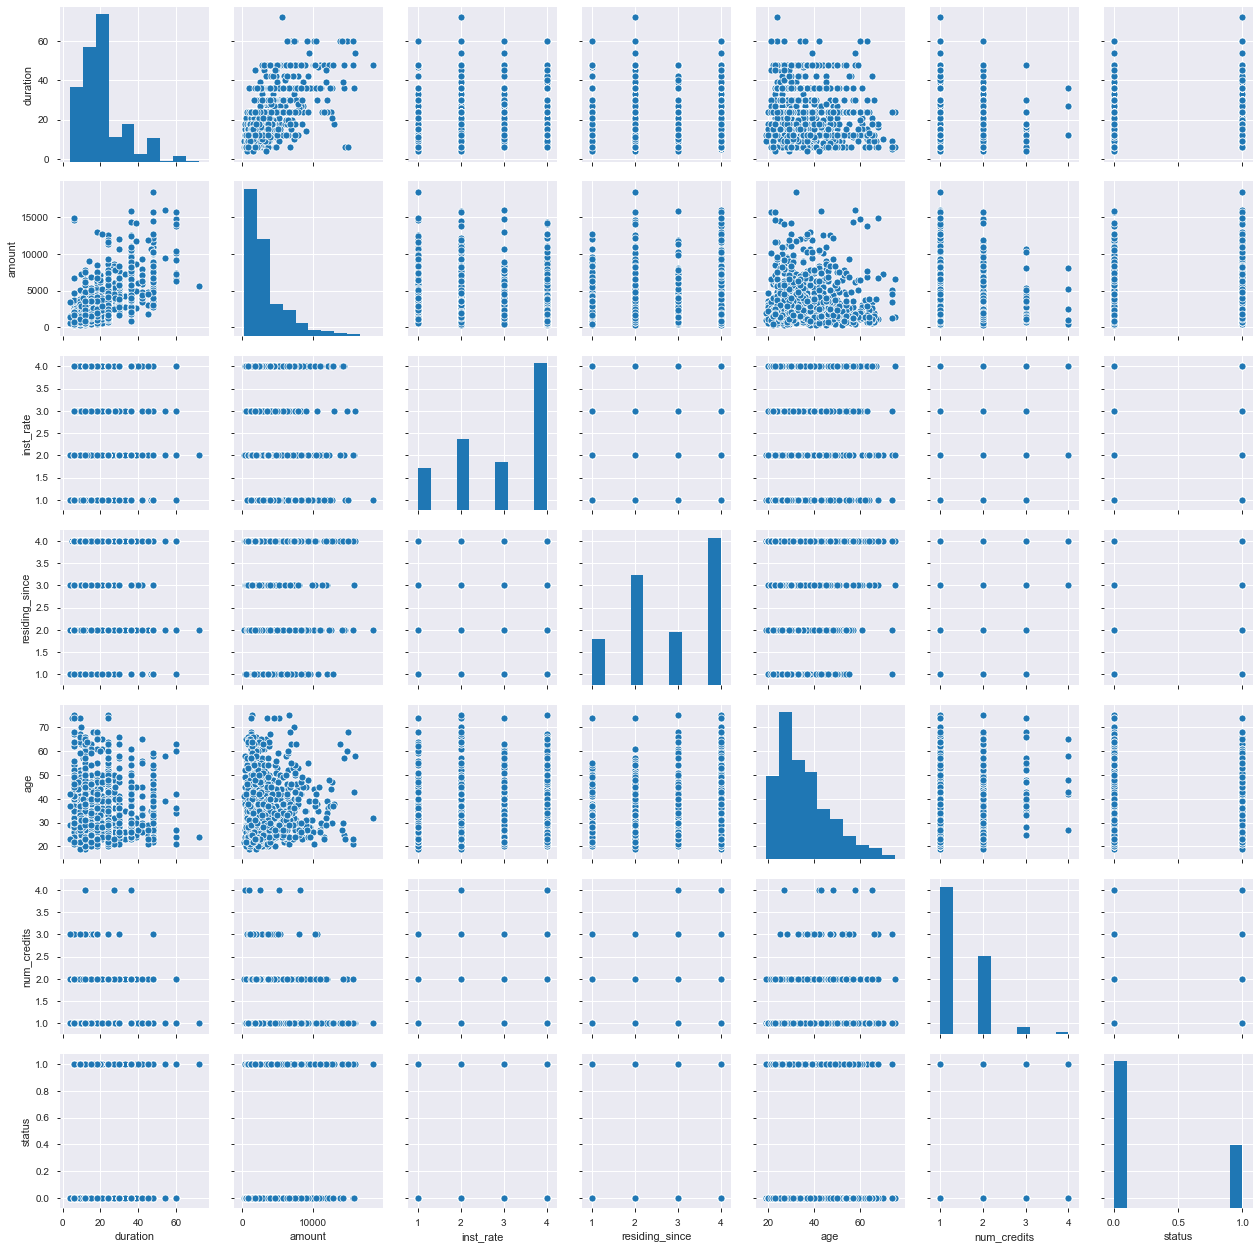

In [10]:
sns.pairplot(credit_df)

In [11]:
credit_df.iloc[0:5,1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [12]:
credit_df.iloc[0:5,7:] 

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [14]:
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

In [17]:
import matplotlib.pyplot as plt

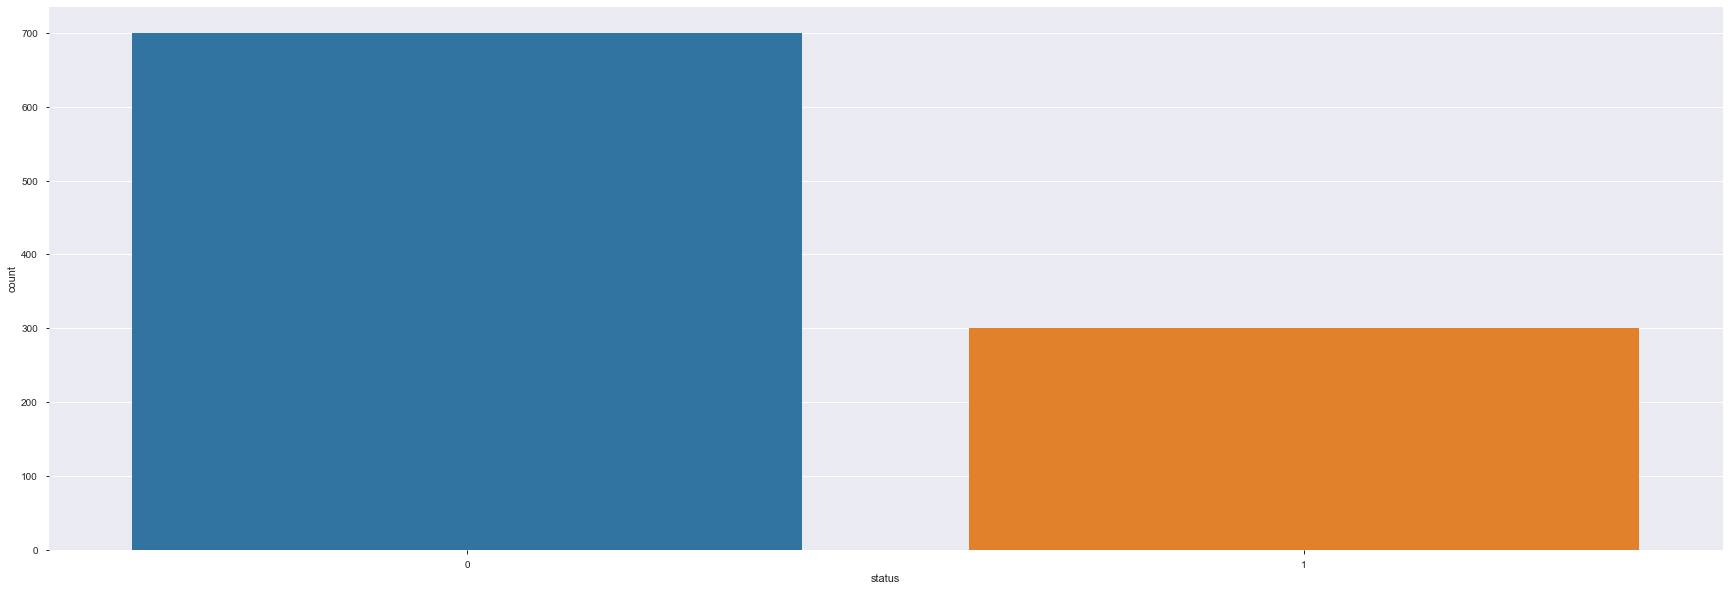

In [19]:
plt.figure(figsize=(30,10))
sns.countplot(credit_df.status)

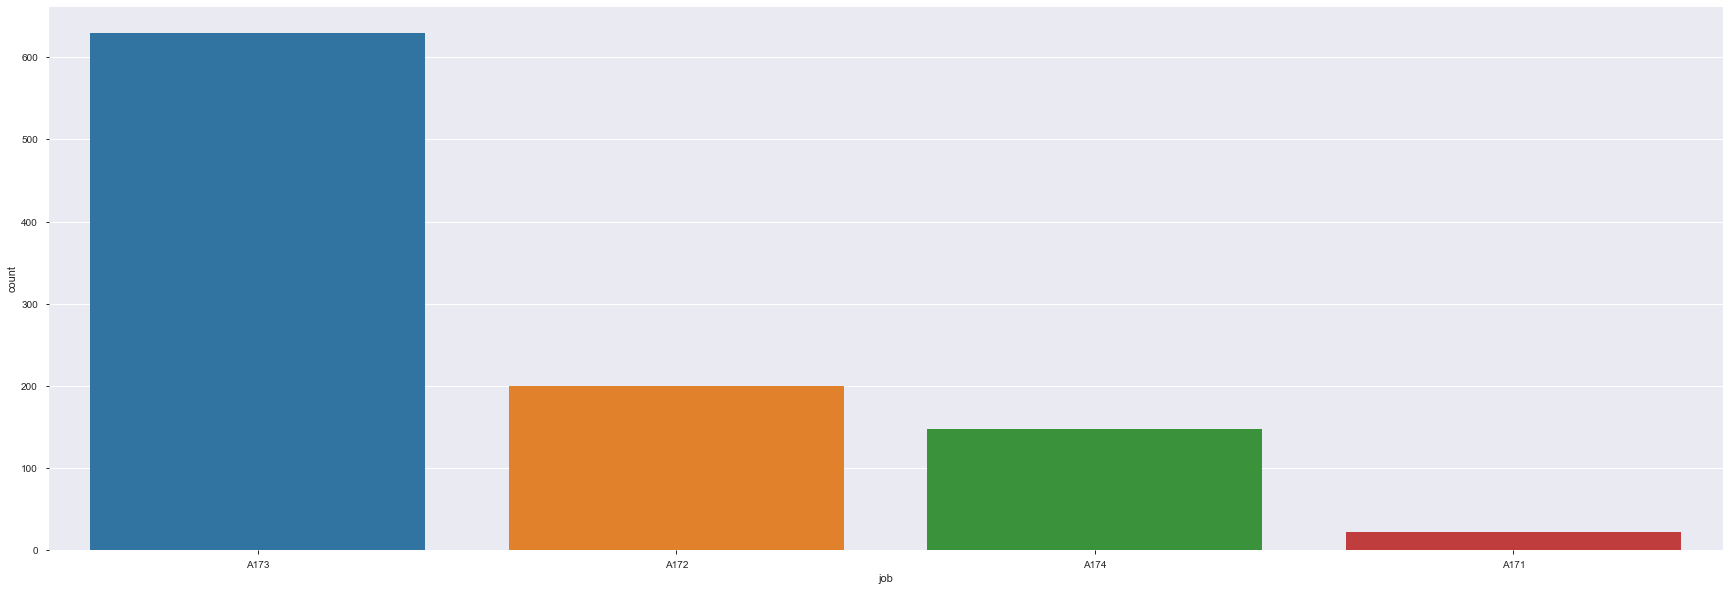

In [21]:
plt.figure(figsize=(30,10))
sns.countplot(credit_df.job)

In [22]:
X_features = list( credit_df.columns ) 
X_features.remove( 'status' ) 
X_features 

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

**Encoding Categorical Features**

In [23]:
encoded_credit_df = pd.get_dummies( credit_df[X_features], 
                                   drop_first = True ) 

In [24]:
encoded_credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
996,30,3857,4,4,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
997,12,804,4,4,38,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
998,45,1845,4,4,23,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [25]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [26]:
encoded_credit_df[['checkin_acc_A12', 
                   'checkin_acc_A13',  
                   'checkin_acc_A14']].head(5) 

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [27]:
import statsmodels.api as sm 

In [28]:
Y = credit_df.status 
X = sm.add_constant( encoded_credit_df )

In [29]:
#Splitting into Train and Validation Sets
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,  
                                                    test_size = 0.3,  
                                                    random_state = 42) 

In [31]:
X_train.shape

(700, 30)

In [32]:
X_test.shape

(300, 30)

In [34]:
y_train.shape

(700,)

**Building Logistic Regression Model by using stast**

In [35]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit() 

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [36]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  700
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                           29
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.1980
Time:                        10:38:00   Log-Likelihood:                -342.26
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 1.063e-21
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1511      1.135     -0.133      0.894      -2.375       2.073
duration                  0.0206      0.010      1.993      0.046       0.000       0.041
amount                    0.0001   4.65e-05      2.377      0.017    1.93e-05       0.000
inst_rate                 0.3064      0.099      3.108      0.002       0.113       0.500
residing_since            0.0967      0.092      1.051      0.293      -0.084       0.277
age                      -0.0227      0.010     -2.213      0.027      -0.043      -0.003
num_credits               0.2854      0.214      1.334      0.182      -0.134       0.705
checkin_acc_A12          -0.4126      0.239     -1.726      0.084      -0.881       0.056
checkin_acc_A13          -0.9053      0.434     -2.087      0.037      -1.756      -0.055
checkin_acc_A14          -1.6052      0.259     -6.207      0.000      -2.112      -1.098
credit_history_A31        0.1532      0.580      0.264      0.792      -0.983       1.289
credit_history_A32       -0.4960      0.441     -1.124      0.261      -1.360       0.369
credit_history_A33       -0.8881      0.502     -1.768      0.077      -1.872       0.096
credit_history_A34       -1.4124      0.453     -3.119      0.002      -2.300      -0.525
savings_acc_A62          -0.0496      0.321     -0.155      0.877      -0.678       0.579
savings_acc_A63          -0.6640      0.482     -1.378      0.168      -1.608       0.280
savings_acc_A64          -1.1099      0.602     -1.844      0.065      -2.290       0.070
savings_acc_A65          -0.6061      0.275     -2.208      0.027      -1.144      -0.068
present_emp_since_A72     0.0855      0.472      0.181      0.856      -0.840       1.011
present_emp_since_A73    -0.0339      0.449     -0.075      0.940      -0.914       0.846
present_emp_since_A74    -0.3789      0.479     -0.791      0.429      -1.318       0.560
present_emp_since_A75    -0.2605      0.455     -0.572      0.567      -1.153       0.632
personal_status_A92      -0.0069      0.484     -0.014      0.989      -0.956       0.942
personal_status_A93      -0.4426      0.476     -0.929      0.353      -1.376       0.491
personal_status_A94      -0.3080      0.555     -0.555      0.579      -1.397       0.781
inst_plans_A142          -0.2976      0.516     -0.577      0.564      -1.308       0.713
inst_plans_A143          -0.4458      0.277     -1.609      0.108      -0.989       0.097
job_A172                 -0.0955      0.768     -0.124      0.901      -1.601       1.410
job_A173                 -0.0198      0.738     -0.027      0.979      -1.466       1.426
job_A174                 -0.0428      0.737     -0.058      0.954      -1.488       1.402
=========================================================================================
"""

In [37]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2020-04-06 10:39  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

**Model Dignostics**
* Feature importence towards the target
* Feeature Selection

In [38]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index 
    var_p_vals_df.columns = ['pvals', 'vars']    
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] ) 

In [40]:
significant_vars = get_significant_vars(logit_model)
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [41]:
final_logit = sm.Logit( y_train, 
                       sm.add_constant( X_train[significant_vars] ) ).fit() 

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [42]:
final_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.1612
Time:                        10:50:32   Log-Likelihood:                -357.94
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 7.419e-26
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8969      0.436     -2.055      0.040      -1.752      -0.042
duration               0.0197      0.010      2.003      0.045       0.000       0.039
amount              9.669e-05   4.17e-05      2.320      0.020     1.5e-05       0.000
inst_rate              0.2811      0.093      3.026      0.002       0.099       0.463
age                   -0.0216      0.009     -2.421      0.015      -0.039      -0.004
checkin_acc_A13       -0.8038      0.408     -1.970      0.049      -1.604      -0.004
checkin_acc_A14       -1.5452      0.219     -7.065      0.000      -1.974      -1.116
credit_history_A34    -0.8781      0.232     -3.786      0.000      -1.333      -0.423
savings_acc_A65       -0.5448      0.258     -2.111      0.035      -1.051      -0.039
======================================================================================
"""

In [43]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2020-04-06 10:50 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

**Predicting on Test Data**

In [44]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                           "predicted_prob": final_logit.predict(  sm.add_constant( X_test[significant_vars] ) ) } )

In [45]:
y_pred_df

,actual,predicted_prob
521,1,0.452449
737,0,0.491820
740,0,0.418416
660,0,0.270285
411,0,0.132119
...,...,...
468,0,0.178787
935,1,0.587925
428,0,0.091998
7,0,0.571859


In [46]:
y_pred_df.sample(10, random_state = 42) 

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [49]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( 
    lambda x: 1 if x > 0.8 else 0)


In [50]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


**Creating a Confusion Matrix**

In [51]:
from sklearn import metrics

In [52]:
def draw_cm( actual, predicted ):    
    ## Cret    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )    
    sns.heatmap(cm, 
                annot=True,  
                fmt='.2f',  
                xticklabels = ["Bad credit", "Good Credit"] , 
                yticklabels = ["Bad credit", "Good Credit"] )    
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')    
    plt.show()

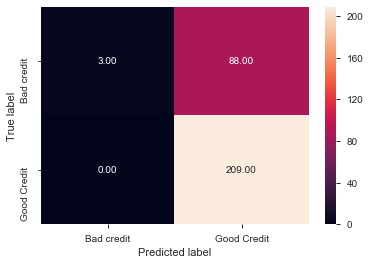

In [53]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [55]:
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted ))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       209
           1       1.00      0.03      0.06        91

    accuracy                           0.71       300
   macro avg       0.85      0.52      0.44       300
weighted avg       0.79      0.71      0.59       300



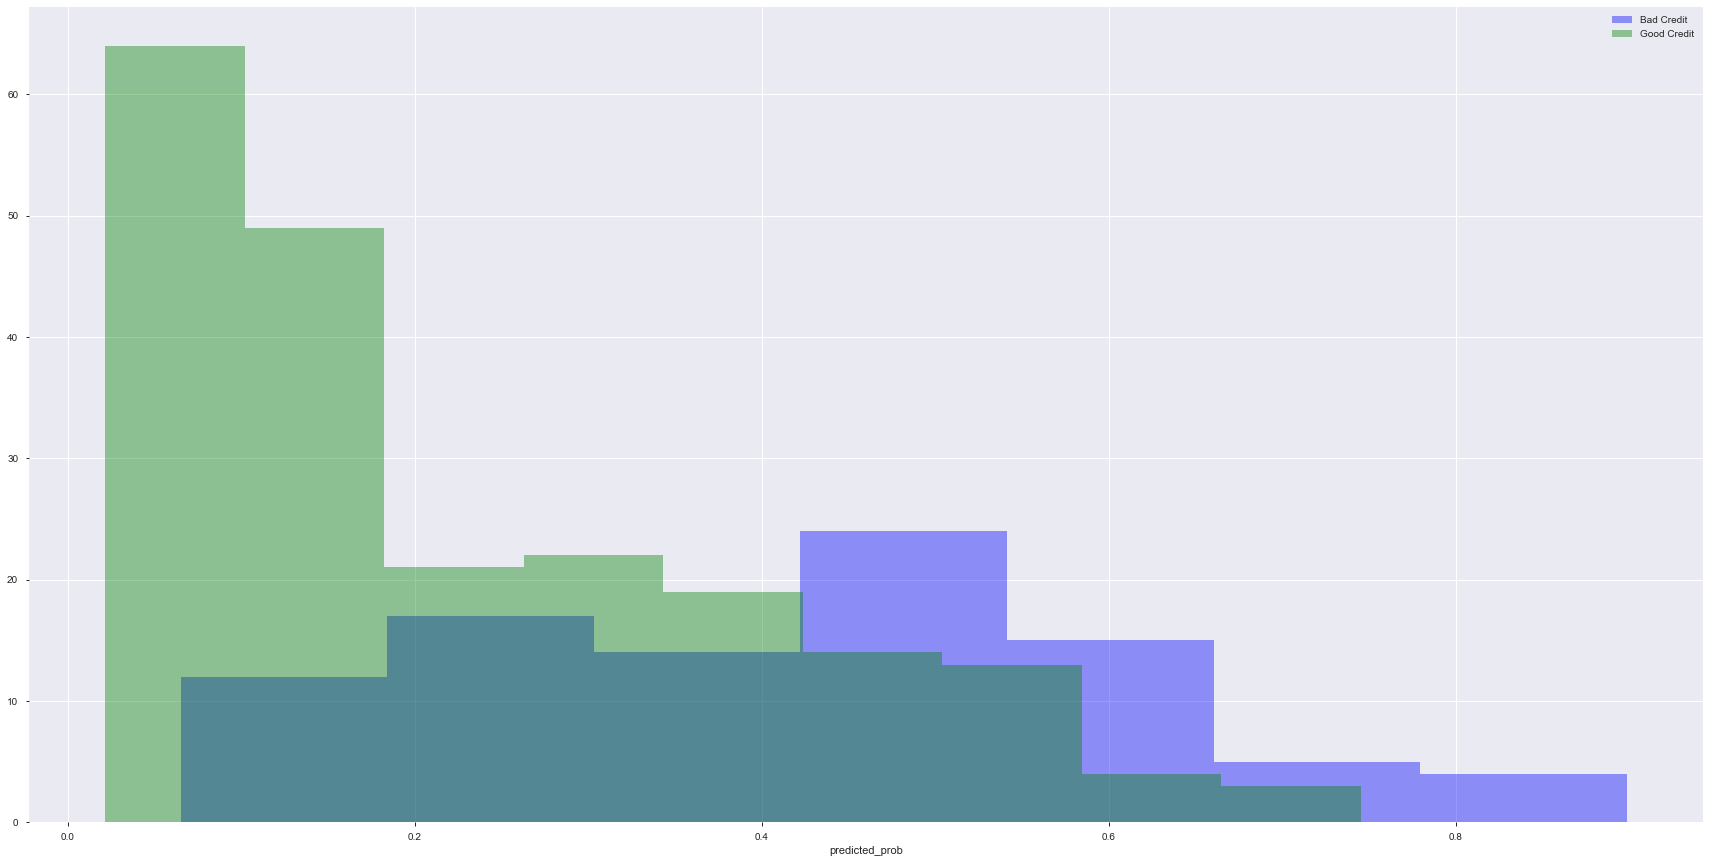

In [58]:
plt.figure( figsize = (30,15) ) 
sns.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], 
             kde=False, 
             color = 'b', 
             label = 'Bad Credit' ) 
sns.distplot(y_pred_df[y_pred_df.actual==0]["predicted_prob"], 
             kde=False, 
             color = 'g', 
             label = 'Good Credit')
plt.legend()

### scikit Learn

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
New_predication = model.predict(X_test)
New_predication

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], d

In [63]:
Train_score = model.score(X_train,y_train)

In [64]:
Test_score = model.score(X_test,y_test)

In [65]:
Train_score

0.7628571428571429

In [66]:
Test_score

0.7733333333333333

In [68]:
pd.DataFrame({'Actual_Data':y_test,
             "New_predication":New_predication,
             })

,Actual_Data,New_predication
521,1,1
737,0,0
740,0,1
660,0,0
411,0,0
...,...,...
468,0,0
935,1,1
428,0,0
7,0,0


In [72]:
print(metrics.classification_report(y_test,New_predication))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       209
           1       0.72      0.42      0.53        91

    accuracy                           0.77       300
   macro avg       0.75      0.67      0.69       300
weighted avg       0.76      0.77      0.75       300



In [73]:
cm = metrics.confusion_matrix(y_test,New_predication)
cm

array([[194,  15],
       [ 53,  38]], dtype=int64)

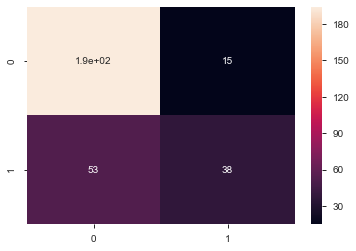

In [76]:
sns.heatmap(cm,annot=True)

## KNN for this Data

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
KNN = KNeighborsClassifier(n_neighbors=6)

In [98]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [99]:
KNN.score(X_train,y_train)

0.7585714285714286

In [100]:
KNN.score(X_test,y_test)

0.68